In [3]:
import config as c
from assim_tools.common import *
from assim_tools.obs import *
from grid import Grid
import pyproj
import numpy as np
import matplotlib.pyplot as plt


In [6]:
c.obs_def

{'ocean_temp': {'source': 'Argo',
  'model': 'topaz.v4',
  'err_type': 'normal',
  'err': 0.3,
  'hroi': 200000.0,
  'vroi': inf,
  'troi': inf,
  'impact': {'seaice_drift': 1.0,
   'seaice_conc': 1.0,
   'seaice_thick': 1.0,
   'ocean_velocity': 1.0,
   'ocean_temp': 1.0,
   'ocean_saln': 1.0}},
 'ocean_saln': {'source': 'Argo',
  'model': 'topaz.v4',
  'err_type': 'normal',
  'err': 0.3,
  'hroi': 200000.0,
  'vroi': inf,
  'troi': inf,
  'impact': {'seaice_drift': 1.0,
   'seaice_conc': 1.0,
   'seaice_thick': 1.0,
   'ocean_velocity': 1.0,
   'ocean_temp': 1.0,
   'ocean_saln': 1.0}}}

In [7]:
info

{'nobs': 2000,
 'nens': 32,
 'obs_seq': {0: {'name': 'ocean_temp',
   'source': 'Argo',
   'model': 'topaz.v4',
   'dtype': 'float',
   'is_vector': False,
   'units': 'K',
   'z_units': 'm',
   'err_type': 'normal',
   'err': 0.3,
   'x': -62737.695,
   'y': 468513.1,
   'z': 3.0,
   'time': datetime.datetime(2007, 1, 2, 0, 0),
   'pos': 0},
  1: {'name': 'ocean_temp',
   'source': 'Argo',
   'model': 'topaz.v4',
   'dtype': 'float',
   'is_vector': False,
   'units': 'K',
   'z_units': 'm',
   'err_type': 'normal',
   'err': 0.3,
   'x': -91751.81,
   'y': -351735.47,
   'z': 3.0,
   'time': datetime.datetime(2007, 1, 2, 0, 0),
   'pos': 132},
  2: {'name': 'ocean_temp',
   'source': 'Argo',
   'model': 'topaz.v4',
   'dtype': 'float',
   'is_vector': False,
   'units': 'K',
   'z_units': 'm',
   'err_type': 'normal',
   'err': 0.3,
   'x': -908353.3,
   'y': 888430.25,
   'z': 3.0,
   'time': datetime.datetime(2007, 1, 2, 0, 0),
   'pos': 264},
  3: {'name': 'ocean_temp',
   'source

In [4]:
obs_seq_file = '/cluster/work/users/yingyue/exp1/analysis/200701020000/obs_seq.bin'

In [5]:
info = read_obs_info(obs_seq_file)

In [10]:
m = 1
name = 'ocean_saln'

In [11]:
obs_seq = read_obs(obs_seq_file, info, info['obs_seq'].values(), member=None)

In [40]:
x = np.array([r['x'] for r in obs_seq if r['name']==name])
y = np.array([r['y'] for r in obs_seq if r['name']==name])
g = Grid(c.grid.proj, x, y, regular=False)
v = np.array([r['value'][0] for r in obs_seq if r['name']==name])

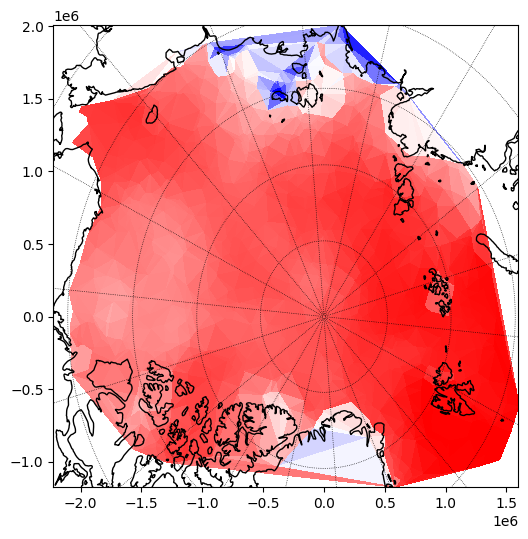

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(6,6))
g.plot_field(ax, v, cmap='bwr')
g.plot_land(ax)

##need a paintball plot tool for showing obs network
###


In [6]:
local_obs = read_local_obs(obs_seq_file, info, [23, 24, 25])

In [5]:
local_obs

{'obs': array([-1.64014292, -1.59797263, -1.75606084]),
 'obs_prior': array([[-1.64090323, -1.6038096 , -1.76045358],
        [-1.64111865, -1.59868491, -1.75583804],
        [-1.64097035, -1.59878361, -1.75892079],
        [-1.64391744, -1.59776521, -1.75758016],
        [-1.64305258, -1.59846914, -1.75770152],
        [-1.64030659, -1.59681916, -1.75645363],
        [-1.64169157, -1.60008085, -1.75714409],
        [-1.64361584, -1.59747386, -1.75582612],
        [-1.64050019, -1.59771824, -1.75592983],
        [-1.63845766, -1.60031211, -1.75270379],
        [-1.64244604, -1.59853482, -1.75683677],
        [-1.64072263, -1.59787309, -1.75739563],
        [-1.64230859, -1.59786201, -1.75835299],
        [-1.64133072, -1.59886062, -1.75713587],
        [-1.64210343, -1.59841192, -1.75762999],
        [-1.6395117 , -1.60104859, -1.75804114],
        [-1.64345884, -1.59915125, -1.75844073],
        [-1.64033997, -1.59855855, -1.75914371],
        [-1.64131951, -1.59918475, -1.75550413],


In [7]:
local_obs['obs_prior'].shape

(32, 3)